## Network analysis

### 1. Data preprocessing and visualization

In [1]:
import pandas as pd

# Import the data
applications = pd.read_json('D:\\events\\applications.json')

# Print overview
applications.head(3)

,appIdConsumer,appIdProvider,beatId,beatType,callId,callMode,callScope,correlationId,durationMs,eventTime,...,orgBezeichnung,orgId,orgKurzbezeichnung,orgSubkategorien,parentCallId,role,stage,tkNameIdConsumer,tkNameIdProvider,userId
0,spoud-app,sim-provider,0,ServiceProviderBeat,0,SYNC,LOCAL,6ee2fa2b-a1ca-405e-9088-94dbb834730f,201,2018-05-05T07:55:38.422185+00:00,...,Bellinzona,na,na,GA,superloser,provider,SIM,spoud-portal,tm4-Mond-52,SIMU147400
1,spoud-app,sim-provider,2,ServiceProviderBeat,2,SYNC,LOCAL,7aa2e01f-4af6-48e8-ae98-a42fe9fc6e5d,201,2018-05-05T07:55:38.432086+00:00,...,Lyss,na,na,GA,superloser,provider,SIM,spoud-portal,tm4-Mond-52,SIMU534284
2,spoud-app,sim-provider,4,ServiceProviderBeat,4,SYNC,LOCAL,f722a638-7e0d-4f19-86ad-7aeecbffa40f,201,2018-05-05T07:55:38.441987+00:00,...,Winterthur,na,na,GA,superloser,provider,SIM,spoud-portal,tm4-Mond-52,SIMU816207


In [2]:
# Print some initial statistics
applications.describe()

,beatId,callId,durationMs,meta_linecount,meta_version
count,1.296000e+06,1.296000e+06,1.296000e+06,1296000.0,1.296000e+06
mean,1.799000e+03,1.169906e+02,3.598675e+02,1.0,1.000000e-01
std,1.039231e+03,8.128626e+01,1.350601e+02,0.0,2.357893e-12
min,0.000000e+00,0.000000e+00,2.000000e+02,1.0,1.000000e-01
25%,8.995000e+02,4.950000e+01,2.690000e+02,1.0,1.000000e-01
50%,1.799000e+03,1.020000e+02,3.400000e+02,1.0,1.000000e-01
75%,2.698500e+03,1.760000e+02,4.250000e+02,1.0,1.000000e-01
max,3.598000e+03,3.180000e+02,1.955000e+03,1.0,1.000000e-01


#### Worktime calculation

$$\large w_t = \bar{r}_n * n_c $$

($ w_t $ = worktime,
$ r_t $ = response time,
$ n_c $ = throughput / number of service calls)


In [30]:
# Overview of involved components
tk_field, event_time_field, duration_field = 'tkNameIdProvider', 'eventTime', 'durationMs'
id_fields = ['appIdProvider', 'fkNameProvider', tk_field]
unique_components = zip([id_field for id_field in id_fields], 
                        ['Application', 'Functional component', 'Technical component'])
for field, name in unique_components:
    unique_components = applications[field].unique()
    print('%d %s\'s:' % (unique_components.size, name), end=' ')
    print(', '.join(str(c) for c in unique_components))

1 Application's: sim-provider
1 Functional component's: fkNameProvider
18 Technical component's: tm4-Mond-52, tm4-Phobos-52, tm4-Deimos-52, tm4-Adrastea-52, tm4-Metis-52, tm4-Amalthea-52, tm4-Thebe-52, tm4-Io-52, tm4-Europa-52, tm4-Ganymed-52, tm4-Kallisto-52, tm4-Themisto-52, tm4-Leda-52, tm4-Himalaia-52, tm4-Lysithea-52, tm4-Elara-52, tm4-Carpo-52, tm4-Euporie-52


In [60]:
# Create dataset with one minute buckets and only relevant information
performance = applications[[tk_field, duration_field, event_time_field]]
performance = performance.set_index(event_time_field)
performance.index = pd.to_datetime(performance.index)

In [82]:
# Evaluate time delta of measurements
performance.index.max() - performance.index.min()

Timedelta('0 days 11:59:00.993711')

In [113]:
# Group the data into one minutes bin grouped by technical component
performance_bins = performance.groupby(tk_field).resample('1T').sum() \
    .reset_index() \
    .pivot(index='eventTime', columns='tkNameIdProvider', values='durationMs')

In [132]:
performance_bins

tkNameIdProvider,tm4-Adrastea-52,tm4-Amalthea-52,tm4-Carpo-52,tm4-Deimos-52,tm4-Elara-52,tm4-Euporie-52,tm4-Europa-52,tm4-Ganymed-52,tm4-Himalaia-52,tm4-Io-52,tm4-Kallisto-52,tm4-Leda-52,tm4-Lysithea-52,tm4-Metis-52,tm4-Mond-52,tm4-Phobos-52,tm4-Thebe-52,tm4-Themisto-52
eventTime,,,,,,,,,,,,,,,,,,
2018-05-05 07:55:00,30704,32118,12648,28078,9996,16400,24360,20097,8364,28014,15834,9792,8364,32118,20301,24522,30502,12383
2018-05-05 07:56:00,31212,32595,13167,28560,10241,17010,24514,20286,8528,28222,16146,9776,8569,32595,20706,24766,30955,12420
2018-05-05 07:57:00,31671,32864,13696,29046,10700,17630,24780,20370,8520,28424,16247,9964,8946,33120,21115,25215,31200,12449
2018-05-05 07:58:00,32186,33338,14235,29536,10900,18260,24921,20544,8680,28620,16340,9936,9156,33600,21528,25668,31650,12470
2018-05-05 07:59:00,32494,33654,14784,29820,11373,18900,25056,20615,8840,28810,16350,10120,9324,33920,21840,26125,31886,12702
2018-05-05 08:00:00,33170,34128,15114,30459,11628,19550,25300,20774,9040,29212,16428,10080,9534,34400,22260,26586,32333,12711
2018-05-05 08:01:00,33480,34383,15678,30960,12116,20445,25199,20832,9200,29526,16498,10305,9933,34720,22684,27051,32560,12712
2018-05-05 08:02:00,34008,34854,16252,31465,12561,21208,25312,20976,9360,29700,16560,10252,10148,35200,23112,27520,32781,12705
2018-05-05 08:03:00,34476,35168,16836,31755,12826,21894,25530,21112,9560,29868,16543,10428,10320,35680,23544,27993,33222,12925


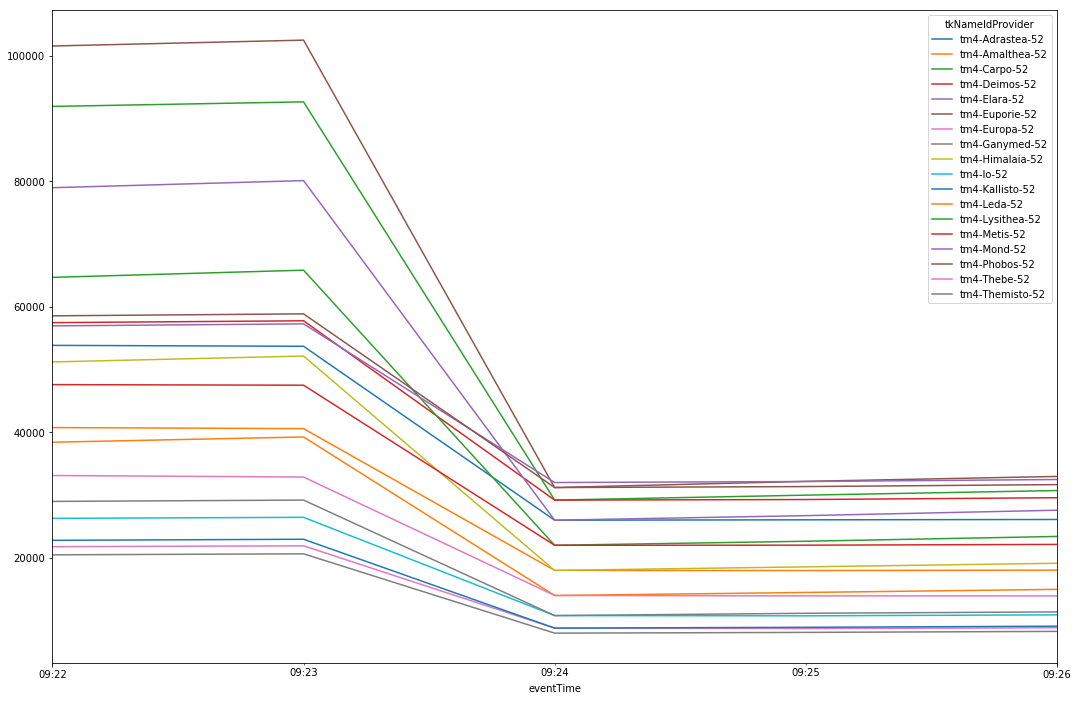

In [138]:
ax = performance_bins['2018-05-05 09:22:00':'2018-05-05 09:26:00'].plot(figsize=(18,12))
plt.show()

In [153]:
applications.describe()

,beatId,callId,durationMs,meta_linecount,meta_version
count,1.296000e+06,1.296000e+06,1.296000e+06,1296000.0,1.296000e+06
mean,1.799000e+03,1.169906e+02,3.598675e+02,1.0,1.000000e-01
std,1.039231e+03,8.128626e+01,1.350601e+02,0.0,2.357893e-12
min,0.000000e+00,0.000000e+00,2.000000e+02,1.0,1.000000e-01
25%,8.995000e+02,4.950000e+01,2.690000e+02,1.0,1.000000e-01
50%,1.799000e+03,1.020000e+02,3.400000e+02,1.0,1.000000e-01
75%,2.698500e+03,1.760000e+02,4.250000e+02,1.0,1.000000e-01
max,3.598000e+03,3.180000e+02,1.955000e+03,1.0,1.000000e-01


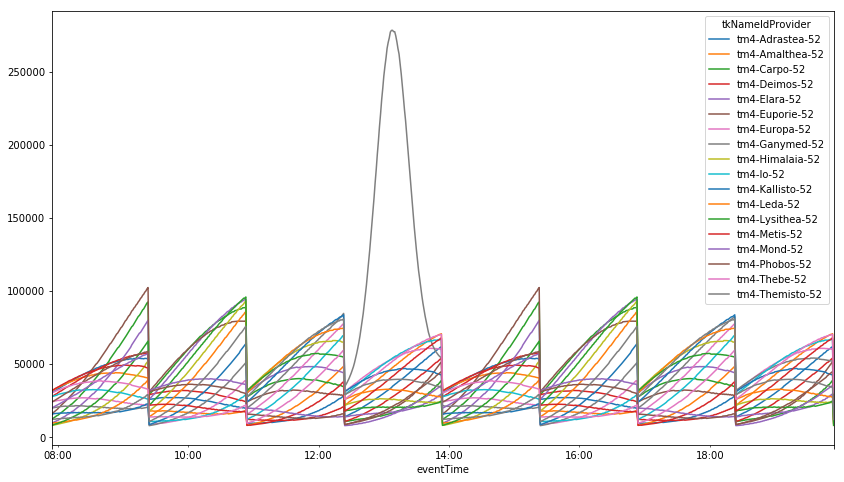

In [140]:
ax = performance_bins.plot(figsize=(14,8))
plt.show()

In [150]:
import plotly.plotly as py
from plotly.graph_objs import *

import plotly.figure_factory as ff

#fig = [Line(performance_bins)]
py.iplot(ff.create_table(performance_bins), filename='jupyter-table1')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

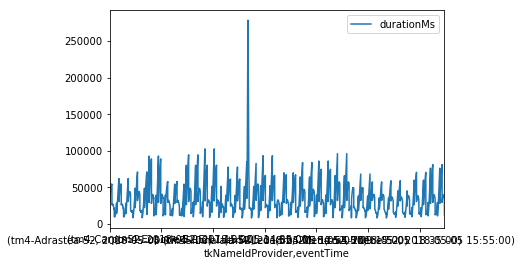

In [106]:
import matplotlib.pyplot as plt
plt.show()

In [99]:
performance_bins

durationMs
tkNameIdProvider eventTime                      
tm4-Adrastea-52  2018-05-05 07:55:00       30704
                 2018-05-05 07:56:00       31212
                 2018-05-05 07:57:00       31671
                 2018-05-05 07:58:00       32186
                 2018-05-05 07:59:00       32494
                 2018-05-05 08:00:00       33170
                 2018-05-05 08:01:00       33480
                 2018-05-05 08:02:00       34008
                 2018-05-05 08:03:00       34476
                 2018-05-05 08:04:00       34788
                 2018-05-05 08:05:00       35482
                 2018-05-05 08:06:00       35796
                 2018-05-05 08:07:00       36110
                 2018-05-05 08:08:00       36814
                 2018-05-05 08:09:00       37130
                 2018-05-05 08:10:00       37446
                 2018-05-05 08:11:00       37920
                 2018-05-05 08:12:00       38478
                 2018-05-05 08:13:00       38955
                 2018-05-05 08:14:00       39273
                 2018-05-05 08:15:00       39591
                 2018-05-05 08:16:00       40068
                 2018-05-05 08:17:00       40640
                 2018-05-05 08:18:00       40960
                 2018-05-05 08:19:00       41440
                 2018-05-05 08:20:00       41760
                 2018-05-05 08:21:00       42240
                 2018-05-05 08:22:00       42560
                 2018-05-05 08:23:00       42880
                 2018-05-05 08:24:00       43360
...                                          ...
tm4-Themisto-52  2018-05-05 19:25:00       39160
                 2018-05-05 19:26:00       39072
                 2018-05-05 19:27:00       38976
                 2018-05-05 19:28:00       38420
                 2018-05-05 19:29:00       38304
                 2018-05-05 19:30:00       38180
                 2018-05-05 19:31:00       38048
                 2018-05-05 19:32:00       37908
                 2018-05-05 19:33:00       37760
                 2018-05-05 19:34:00       37604
                 2018-05-05 19:35:00       37440
                 2018-05-05 19:36:00       37752
                 2018-05-05 19:37:00       37576
                 2018-05-05 19:38:00       37392
                 2018-05-05 19:39:00       37200
                 2018-05-05 19:40:00       37000
                 2018-05-05 19:41:00       36792
                 2018-05-05 19:42:00       36576
                 2018-05-05 19:43:00       36352
                 2018-05-05 19:44:00       36120
                 2018-05-05 19:45:00       35880
                 2018-05-05 19:46:00       35564
                 2018-05-05 19:47:00       35309
                 2018-05-05 19:48:00       35046
                 2018-05-05 19:49:00       35310
                 2018-05-05 19:50:00       35035
                 2018-05-05 19:51:00       34752
                 2018-05-05 19:52:00       34461
                 2018-05-05 19:53:00       34162
                 2018-05-05 19:54:00       12200

[12960 rows x 1 columns]

In [97]:
performance_bins.unstack()

durationMs                                          \
eventTime        2018-05-05 07:55:00 2018-05-05 07:56:00 2018-05-05 07:57:00   
tkNameIdProvider                                                               
tm4-Adrastea-52                30704               31212               31671   
tm4-Amalthea-52                32118               32595               32864   
tm4-Carpo-52                   12648               13167               13696   
tm4-Deimos-52                  28078               28560               29046   
tm4-Elara-52                    9996               10241               10700   
tm4-Euporie-52                 16400               17010               17630   
tm4-Europa-52                  24360               24514               24780   
tm4-Ganymed-52                 20097               20286               20370   
tm4-Himalaia-52                 8364                8528                8520   
tm4-Io-52                      28014               28222               28424   
tm4-Kallisto-52                15834               16146               16247   
tm4-Leda-52                     9792                9776                9964   
tm4-Lysithea-52                 8364                8569                8946   
tm4-Metis-52                   32118               32595               33120   
tm4-Mond-52                    20301               20706               21115   
tm4-Phobos-52                  24522               24766               25215   
tm4-Thebe-52                   30502               30955               31200   
tm4-Themisto-52                12383               12420               12449   

                                                                              \
eventTime        2018-05-05 07:58:00 2018-05-05 07:59:00 2018-05-05 08:00:00   
tkNameIdProvider                                                               
tm4-Adrastea-52                32186               32494               33170   
tm4-Amalthea-52                33338               33654               34128   
tm4-Carpo-52                   14235               14784               15114   
tm4-Deimos-52                  29536               29820               30459   
tm4-Elara-52                   10900               11373               11628   
tm4-Euporie-52                 18260               18900               19550   
tm4-Europa-52                  24921               25056               25300   
tm4-Ganymed-52                 20544               20615               20774   
tm4-Himalaia-52                 8680                8840                9040   
tm4-Io-52                      28620               28810               29212   
tm4-Kallisto-52                16340               16350               16428   
tm4-Leda-52                     9936               10120               10080   
tm4-Lysithea-52                 9156                9324                9534   
tm4-Metis-52                   33600               33920               34400   
tm4-Mond-52                    21528               21840               22260   
tm4-Phobos-52                  25668               26125               26586   
tm4-Thebe-52                   31650               31886               32333   
tm4-Themisto-52                12470               12702               12711   

                                                                              \
eventTime        2018-05-05 08:01:00 2018-05-05 08:02:00 2018-05-05 08:03:00   
tkNameIdProvider                                                               
tm4-Adrastea-52                33480               34008               34476   
tm4-Amalthea-52                34383               34854               35168   
tm4-Carpo-52                   15678               16252               16836   
tm4-Deimos-52                  30960               31465               31755   
tm4-Elara-52                   12116               12561               12826   
tm4-Euporie-52          

In [81]:
performance.tail()

,tkNameIdProvider,durationMs
eventTime,,
2018-05-05 19:54:39.361651,tm4-Euporie-52,200
2018-05-05 19:54:39.374309,tm4-Euporie-52,200
2018-05-05 19:54:39.386967,tm4-Euporie-52,200
2018-05-05 19:54:39.399626,tm4-Euporie-52,200
2018-05-05 19:54:39.412284,tm4-Euporie-52,200


In [62]:
performance.groupby(performance.index.minute).sum()

,durationMs
eventTime,
0,7195338
1,7277204
2,7358233
3,7438313
4,7516250
5,7594189
6,7672468
7,7746695
8,7822141
